# CS6140 Assignments

**Instructions**
1. In each assignment cell, look for the block:
 ```
  #BEGIN YOUR CODE
  raise NotImplementedError.new()
  #END YOUR CODE
 ```
1. Replace this block with your solution.
1. Test your solution by running the cells following your block (indicated by ##TEST##)
1. Click the "Validate" button above to validate the work.

**Notes**
* You may add other cells and functions as needed
* Keep all code in the same notebook
* In order to receive credit, code must "Validate" on the JupyterHub server

---

# Assignment 6: Kernels

In this assignment, we will explore kernels and the kernelized Support Vector Machine. We will not be implementing the Support Vector Machine optimization algorithm, but you are welcome to do so. on your own. Instead, we will use the [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)--an industry-standard algorithm. 

In [478]:
require './assignment_lib'

false

## Question 1.1 (0 Points)

Paste your ```dot```, ```norm```, ```mean```, and ```stdev``` methods in the next cell.

In [515]:
def dot x, w
  sum=0
  x.each do |key1, array1|
    w.each do |key2, array2|
      if key1==key2 and key1!="bias"
        sum+=array1*array2
      end
    end
  end
  return sum
end

def norm w
  sum=0
  sum = Math.sqrt(dot(w,w))
  return sum
end

def mean(array)
  array = array.inject(0.0) { |sum, x| sum += x } / array.size.to_f
end

def stdev x
  m = mean(array)
  variance = array.inject(0.0) { |variance, x| variance += (x - m) ** 2 } 
  standard_deviation = Math.sqrt(variance/(array.size-1).to_f)
  return standard_deviation
end


:stdev

## Question 1.2 (5 Points)

Implement the ```calculate_margin``` function below which determines the geometric margin. Recall that the margin requires calculating the norm of the weight vector--without the bias. Recall that the margin is just one number, so the output of the function below is just one value.

The following image shows the optimal margin for a sample dataset. This corresponds to one of the weight vectors below, you will figure out which one.

![margin-separable.png](margin-separable.png)

In [516]:
def calculate_margin dataset, w
  
  data=dataset["data"]
  
  r=[]
  norm1=norm(w)
  data.each do |item|
    r << item["label"]*(dot(item["features"],w)+w["bias"]).to_f/norm(w)
  end

  return r.min
end

:calculate_margin

In [517]:
def test_3c5e67()
  dataset = two_gaussians_sep_dataset()

  w1 = {"x1" => 0.341517248849071, "x2" => 0.22698102802980452, "bias" => -1.4860798684346137}
  w2 = {"x1" => 1.9615964448725158, "x2"=>1.322858357015272, "bias"=>-9.134050645364391}
  w3 = {"x1" => 2.002639618673358, "x2" => 1.4715091416394062, "bias" => 0.018309357180013794}
  w4 = {"x1" => 4.13242464849763, "x2" => 2.50762341344167, "bias" => -18.6590519796601}
  w5 = {"x1" => 1.0633739433059786, "x2"=>1.2870656701510783, "bias"=>-7.544598345465133}
  puts "Margin of W2", calculate_margin(dataset, w2)
  puts "Margin of W3", calculate_margin(dataset, w3)
  puts "Margin of W4", calculate_margin(dataset, w4)
  puts "Margin of W5", calculate_margin(dataset, w5)
  assert_in_delta -1.824358578224836, calculate_margin(dataset, w1), 1e-3

end 
test_3c5e67()

Margin of W2
-1.5575225394931038
Margin of W3
-5.2391068771758285
Margin of W4
-1.7676466746001211
Margin of W5
0.2809754813868902


## Question 1.3 (5 Points)
Which of the above weight vectors corresponds to the margin in the figure, which shows the maximum margin for the ```two_gaussians_sep_dataset```?

Your answer should be as follows. It is case sensitive.

```ruby
def answer_e785ee()
    return "W8" 
end
```


In [518]:
def answer_e785ee()
  "W5"
end

:answer_e785ee

In [519]:
def test_f04be2()
  assert_true answer_e785ee().is_a?(String)
end
test_f04be2()

## Question 1.4 (10 Points)
Now calculate the margin for different dataset which is not linearly separable. Which of the weight vectors below corresponds to its maximum margin--the one shown in the figure below?

![margin-non-separable](./margin-non-separable.png)

Your answer should be as follows. It is case sensitive.

```ruby
def answer_d218ea()
    return "W8" 
end
```


In [520]:
def test_3c5e67()
  dataset = two_gaussians_dataset()

  w1 = {"x1" => 0.341517248849071, "x2" => 0.22698102802980452, "bias" => -1.4860798684346137}
  w2 = {"x1" => 1.9615964448725158, "x2"=>1.322858357015272, "bias"=>-9.134050645364391}
  w3 = {"x1" => 2.002639618673358, "x2" => 1.4715091416394062, "bias" => 0.018309357180013794}
  w4 = {"x1" => 4.13242464849763, "x2" => 2.50762341344167, "bias" => -18.6590519796601}
  w5 = {"x1" => 1.0633739433059786, "x2"=>1.2870656701510783, "bias"=>-7.544598345465133}
  puts "W2", calculate_margin(dataset, w2)
  puts "W3", calculate_margin(dataset, w3)
  puts "W4", calculate_margin(dataset, w4)
  puts "W5", calculate_margin(dataset, w5)
  assert_in_delta -0.9260633144926164, calculate_margin(dataset, w1), 1e-3
end 
test_3c5e67()

W2
-0.6951456368580061
W3
-4.596769219555084
W4
-0.7344371684609744
W5
-1.6663984698598633


In [521]:
def answer_d218ea()
  "W2"
end

:answer_d218ea

In [522]:
def test_87f7a2()
  assert_true answer_d218ea().is_a?(String)
end
test_87f7a2()

## Question 1.4 (5 Points)

We have seen two maximum margins in the questions above. Some are positive and some are negative. Why? Shouldn't the maximum margin always be positive?

* **A**: The maximum margin is always positive, but in question 1.3, none of them was the maximum margin.
* **B**: The maximum margin is only positive when the data is non-linearly separable such as Question 1.4.
* **C**: The maximum margin is always positive and my implementation is probably just wrong.
* **D**: The maximum margin is only positive when the data is linearly separable such as Question 1.3.

If your answer to the question above it "Z", change the cell below as follows:
```ruby
def answer_b0ae4b()
    return "Z" 
end
```


In [523]:
def answer_b0ae4b()
  "D"
end


:answer_b0ae4b

In [524]:
def test_ae8da0()
  assert_true answer_b0ae4b().is_a?(String)
end
test_ae8da0()

## Question 1.5 (5 Points)

Calculate the support vectors. Recall that the support vectors are those examples which lie either within the margin or exactly on the margin. Given a dataset and a weight vector, return an array of examples which are the support vectors. Do not reorder the examples from the dataset.



Example:

Given the vector: ```{"x1" => 1.0633739433059786, "x2"=>1.2870656701510783, "bias"=>-7.544598345465133}```, return the vectors in an array: 

```ruby
[
    {"features"=>{"x1"=>6.47918178231868, "x2"=>1.28546395369992}, "label"=>1}
    #...
]   
```

Note:
* The LibSVM package has a  tolerance of 0.001, so you may need to allow for this in calculating the support vectors.

In [525]:
def find_support_vectors dataset, w

  data=dataset["data"]
  
  supports=[]
  data.each do |item|
    func=dot(item["features"],w)+w["bias"]
    if ((func.abs)>=0.0000 and (func.abs)<=1.001) 
      supports << item
    end
  end
  
  return supports
  
end

:find_support_vectors

In [526]:
def test_e69175()
  dataset = two_gaussians_sep_dataset()
  w = {"x1" => 1.0633739433059786, "x2"=>1.2870656701510783, "bias"=>-7.544598345465133}
  
  support_vectors = find_support_vectors dataset, w
  support_vectors.each {|sv| puts sv}
  assert_equal 5, support_vectors.size
  
  sv_0 = support_vectors.first["features"]
  assert_in_delta 6.479, sv_0["x1"], 1e-3
  assert_in_delta 1.285, sv_0["x2"], 1e-3
end 
test_e69175()

{"features"=>{"x1"=>6.47918178231868, "x2"=>1.28546395369992}, "label"=>1}
{"features"=>{"x1"=>5.42385035965064, "x2"=>0.844550871352983}, "label"=>-1}
{"features"=>{"x1"=>1.04738472853165, "x2"=>4.21929173416568}, "label"=>-1}
{"features"=>{"x1"=>7.01297057699241, "x2"=>-0.708704476157131}, "label"=>-1}
{"features"=>{"x1"=>5.07257528976597, "x2"=>2.03536512305274}, "label"=>1}


# Question 2

Next, we will implement the ```LinearKernel```. Although we are using an existing package to train the Support Vector Machine, you will implement the predict function.


## Question 2.1 (5 Points)

Implement the linear kernel. Recall the formula for the linear kernel is as follows:

# $K_L(x_i, x_j) = \left < x_i, x_j \right >$

where $\left < \cdot \right >$ is the inner product.

In [527]:
class LinearKernel
  def update_parameter parameter
    parameter.kernel_type = Libsvm::KernelType::LINEAR
  end  
  
  def func x_i, x_j
    return dot(x_i["features"],x_j["features"])
  end
end

:func

In [528]:
def test_ac7e57()
  lin = LinearKernel.new
  examples =  [
    {"features" => {"a" => 2, "b" => 3}, "label" => 1}, 
    {"features" => {"b" => 7, "c" => 1}, "label" => 7},
    {"features" => {"a" => 2, "b" => 3}, "label" => 2}
  ]
  
  z = {"features" => {"a" => -5, "b" => 2}} 
  
  assert_equal -4, lin.func(z, examples[0]), "1"
  assert_equal -4, lin.func(examples[0], z), "2"  
  assert_equal 14.0, lin.func(z, examples[1]), "3"  
  assert_equal 14.0, lin.func(examples[1], z), "4"    
  assert_equal 21, lin.func(examples[0], examples[1]), "5"  
end

test_ac7e57()

## Question 2.2 (5 Points)

The following is the ```train``` method for the ```SupportVectorMachineLearner```, which has been provided for you. The learner calls the LibSVM package and saves the model. Recall that for a Kernelized SVM, the model consists of the support vectors, the bias term, and the $\alpha$ values. 

With the Linear kernel, we can reconstruct the weight vector from the kernelized model. Implement ```to_linear_weights``` to provide the weight vector. Note that these weights correspond to one of the weights  in Question 1.3 above.

In [529]:
require 'libsvm'

class SupportVectorMachineLearner
  include Learner
  attr_reader :model
  def initialize complexity: 1.0, kernel: LinearKernel.new
    @parameters = {"complexity" => complexity, "kernel" => kernel}
  end
  
  def train dataset
    feature_to_id, id_to_feature = create_feature_maps dataset
    libsvm_examples, libsvm_labels = dataset_to_libsvm dataset, feature_to_id

    problem = Libsvm::Problem.new
    parameter = Libsvm::SvmParameter.new

    parameter.cache_size = 1
    parameters["kernel"].update_parameter(parameter)
    parameter.eps = 0.001
    parameter.c = @parameters["complexity"]

    problem.set_examples(libsvm_labels, libsvm_examples)

    filename = "libsvm-#{rand(1e9).to_i.to_s(36)}.model"
    begin
      Libsvm::Model.train(problem, parameter).save(filename)      
      @model = load_support_vectors(filename, id_to_feature)
    ensure
      File.delete filename if File.exists? filename
    end
  end
end

:train

In [530]:
def example_train_libsvm()
  dataset = two_gaussians_sep_dataset()
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new
  
  svm_learner.train dataset
  
  model = svm_learner.model
  puts "Support vectors"
  model["data"].each {|x| puts x}
  puts "Bias", model["bias"]
end
example_train_libsvm()

Support vectors
{"label"=>1, "features"=>{"x1"=>6.4791818, "x2"=>1.285464}, "alpha"=>0.8143410058746133}
{"label"=>1, "features"=>{"x1"=>5.0725753, "x2"=>2.0353651}, "alpha"=>1.0}
{"label"=>-1, "features"=>{"x1"=>5.4238504, "x2"=>0.84455087}, "alpha"=>1.0}
{"label"=>-1, "features"=>{"x1"=>1.0473847, "x2"=>4.2192917}, "alpha"=>0.31000059049063017}
{"label"=>-1, "features"=>{"x1"=>7.0129706, "x2"=>-0.70870448}, "alpha"=>0.5043404153839827}
Bias
-7.544598345465133


In [531]:
def to_linear_weights model_linear
  weights = Hash.new {|h,k| h[k] = 0.0} 
  weights["bias"] = model_linear["bias"]
  data=model_linear["data"]
  
  model_linear["features"].each do |feat|
    data.each do |item|
      weights[feat]=item["features"][feat]*item["alpha"]*item["label"]+weights[feat]
    end
  end
  
  return weights
end

:to_linear_weights

In [532]:
def test_c2e001()
  dataset = two_gaussians_sep_dataset()
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new  
  svm_learner.train dataset  
  model = svm_learner.model
  
  weights = to_linear_weights model  
  puts weights

  assert_in_delta 1.0634, weights["x1"], 1e-3, "x1"
  assert_in_delta 1.2871, weights["x2"], 1e-3, "x2"
end
test_c2e001()

{"bias"=>-7.544598345465133, "x1"=>1.0633739433059786, "x2"=>1.2870656701510783}


In [533]:
def test_88346a()
  dataset = two_gaussians_dataset()
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new  
  svm_learner.train dataset  
  model = svm_learner.model
  
  weights = to_linear_weights model  
  puts weights
  
  assert_in_delta 1.9616, weights["x1"], 1e-3, "x1"
  assert_in_delta 1.3229, weights["x2"], 1e-3, "x2"
end
test_88346a()

{"bias"=>-9.134050645364391, "x1"=>1.9615964448725158, "x2"=>1.322858357015272}


## Question 2.2 (5 Points)

Verify that the bias is calculated correctly. Each example in the support vector dataset has a value called ```alpha```. Recall that for each example $i$ there $0 < \alpha_i < C$, we can calculate the bias directly. We will follow the convention used in LibSVM and return the average bias calculated based on this method.

In [534]:
def estimate_bias model_linear, c
  est_bias = 0.0

  biases=[]
  data=model_linear["data"]
  num=0
  weights=to_linear_weights model_linear
  
  data.each do |item|
    
    if item["alpha"]<c and item["alpha"]>0
      bias=item["label"]-dot(weights,item["features"])
      biases << bias
    else
    end
  end

  average=mean(biases)
  return average
end

:estimate_bias

In [535]:
def test_e2475a()
  dataset = two_gaussians_dataset()
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new  
  svm_learner.train dataset  
  model = svm_learner.model
  true_bias = model.delete "bias"
  
  estimated_bias = estimate_bias model, 1.0

  assert_in_delta -9.1340, true_bias, 1e-3
  assert_in_delta -9.1340, estimated_bias, 1e-3
end
test_e2475a()

In [536]:
def test_78c3cc()
  dataset = two_gaussians_sep_dataset()
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new  
  svm_learner.train dataset  
  model = svm_learner.model
  true_bias = model.delete "bias"
  
  estimated_bias = estimate_bias model, 1.0  
  assert_in_delta -7.5446, true_bias, 1e-3
  assert_in_delta -7.5446, estimated_bias, 1e-3
end
test_78c3cc()

## Question 2.3 (5 Points)

After training the Support Vector Machine, let's verify that the trainer returns the same support vectors you calculated earlier. The verification is as follows:

1. Train a model with the LibSVM libray to return support vectors, $S$
1. Call your ```to_linear_weights``` to return a weight vector, $w$
1. Call your ```find_support_vectors``` with $w$ to find the support vectors, $\tilde{S}$
1. Verify that $S \approx \tilde{S}$

Obviously, you used the support vectors $S$ to calculate $w$ but the code earlier used the weight vector $w$ to calculate the support vectors. 


In [537]:
def test_3c5e67()
  dataset = two_gaussians_sep_dataset()  
  #puts dataset
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new  
  svm_learner.train dataset  
  model = svm_learner.model

  sorted_learned_support_vectors = model["data"].sort_by {|sv| [sv["label"], sv["x1"]]}
  
  #Calculate the weights
  weights = to_linear_weights model
  
  #Calculate the support vectors based on these weights
  support_vectors = find_support_vectors dataset, weights

  sorted_manual_support_vectors = support_vectors.sort_by {|sv| [sv["label"], sv["x1"]]}

  #Verify that they are the same
  #assert_equal 5, sorted_learned_support_vectors.size, "T1"
  #assert_equal 5, sorted_manual_support_vectors.size, "T2"
  puts "manual"
  puts sorted_manual_support_vectors
  puts "learned"
  puts sorted_learned_support_vectors
  checked = 0
  5.times do |i|
    sv_learned = sorted_learned_support_vectors[i]
    sv_manual = sorted_manual_support_vectors[i]
    %w(x1 x2).each do |k|
      assert_in_delta sv_learned[k], sv_manual[k], 1e-3, "SV[#{i}][#{k}]"
      checked += 1
    end
  end
  assert_equal 10, checked
end 
test_3c5e67()

manual
[{"features"=>{"x1"=>5.42385035965064, "x2"=>0.844550871352983}, "label"=>-1}, {"features"=>{"x1"=>1.04738472853165, "x2"=>4.21929173416568}, "label"=>-1}, {"features"=>{"x1"=>7.01297057699241, "x2"=>-0.708704476157131}, "label"=>-1}, {"features"=>{"x1"=>6.47918178231868, "x2"=>1.28546395369992}, "label"=>1}, {"features"=>{"x1"=>5.07257528976597, "x2"=>2.03536512305274}, "label"=>1}]
learned
[{"label"=>-1, "features"=>{"x1"=>5.4238504, "x2"=>0.84455087}, "alpha"=>1.0}, {"label"=>-1, "features"=>{"x1"=>1.0473847, "x2"=>4.2192917}, "alpha"=>0.31000059049063017}, {"label"=>-1, "features"=>{"x1"=>7.0129706, "x2"=>-0.70870448}, "alpha"=>0.5043404153839827}, {"label"=>1, "features"=>{"x1"=>6.4791818, "x2"=>1.285464}, "alpha"=>0.8143410058746133}, {"label"=>1, "features"=>{"x1"=>5.0725753, "x2"=>2.0353651}, "alpha"=>1.0}]


In [538]:
def test_3c5e67()
  dataset = two_gaussians_sep_dataset()  
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new  
  svm_learner.train dataset  
  model = svm_learner.model
  sorted_learned_support_vectors = model["data"].sort_by {|sv| [sv["label"], sv["x1"]]}
  
  #Calculate the weights
  weights = to_linear_weights model
  
  #Calculate the support vectors based on these weights
  support_vectors = find_support_vectors dataset, weights
  sorted_manual_support_vectors = support_vectors.sort_by {|sv| [sv["label"], sv["x1"]]}
  
  #Verify that they are the same
  assert_equal 5, sorted_learned_support_vectors.size, "T1"
  assert_equal 5, sorted_manual_support_vectors.size, "T2"
  checked = 0
  5.times do |i|
    sv_learned = sorted_learned_support_vectors[i]
    sv_manual = sorted_manual_support_vectors[i]
    %w(x1 x2).each do |k|
      assert_in_delta sv_learned[k], sv_manual[k], 1e-3, "SV[#{i}][#{k}]"
      checked += 1
    end
  end
  assert_equal 10, checked
end 
test_3c5e67()

## Question 2.4 (5 Points) 

Implement the ```predict``` function for the learner, which takes an example and uses the support vectors to predict the margin score for the example. Recall that the margin score is output of the SVM rather than the posterior $P(c\mid x)$, which is not directly obtainable from an SVM. Make this predict function work for any kernel, not just the linear one.



In [665]:
class SupportVectorMachineLearner 
  def evaluate eval_dataset
    examples = eval_dataset["data"]
    examples.map do |example|
      score = predict(example)
      label = example["label"] > 0 ? 1 : 0
      [score, label]
    end
  end
  
  def predict example
    
    sum=0
    @model["data"].each do |item|
      sum+=item["alpha"]*item["label"]*parameters["kernel"].func(item,example)
    end
    
    estimated_bias = estimate_bias @model, 1.0
    
    return sum+estimated_bias
  
    
  end
end

:predict

In [666]:
def test_598d4a()
  dataset = two_gaussians_sep_dataset()  
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new  
  svm_learner.train dataset  
  model = svm_learner.model

  example1 = {"features" => {"x1" => 6.0, "x2" => 6.0}}  
  score1 = svm_learner.predict(example1)
  
  puts score1  
  assert_true(score1 > 0, "example1 is positive")
  
  example2 = {"features" => {"x1" => -2.0, "x2" => 0.0}}  
  score2 = svm_learner.predict(example2)
  puts score2
  assert_true(score2 < 0, "example2 is negative")
  
  example3 = {"features" => {"x1" => 6.479, "x2" => 1.285}}  
  score3 = svm_learner.predict(example3)
  puts score3
  assert_true(score3 > 0, "example3 is a positive support vector")  
  assert_in_delta(1.0, score3, 1e-2)
end
test_598d4a()

6.558038421602743
-9.671347145751547
0.9988799056839754


## Question 2.5 (10 Points)

Paste your ```AUCMetric``` implementation below, including ```roc_curve``` and ```apply```. We will use this to draw an ROC curve for some of our datasets. 

In [667]:
def true_positive(scores, t)
  false_positive=0
  false_negative=0
  true_positive=0
  true_negative=0
  total=0
  scores.each do |item|
    next if item==nil
    if item[0]<t and item[1]!=1.0
      true_negative+=1.0
    elsif item[0]>=t and item[1]==1.0
      true_positive+=1.0
    elsif item[0]>=t and item[1]!=1.0
      false_positive+=1.0
    elsif item[0]<t and item[1]==1.0
      false_negative+=1.0
    end 
  end
      
  return (true_positive)/(true_positive+false_negative)
end

:true_positive

In [668]:
def false_positive(scores, t)

  false_positive=0
  false_negative=0
  true_positive=0
  true_negative=0
  total=0
  scores.each do |item|
    next if item==nil
    if item[0]<t and item[1]!=1.0
      true_negative+=1.0
    elsif item[0]>=t and item[1]==1.0
      true_positive+=1.0
    elsif item[0]>=t and item[1]!=1.0
      false_positive+=1.0
    elsif item[0]<t and item[1]==1.0
      false_negative+=1.0
    end 
  end
  
  return (false_positive)/((true_negative+false_positive))
end

:false_positive

In [669]:
class AUCMetric 
  include Metric
  
  def roc_curve(scores)
    max = scores[0][0]
    min = scores[0][0]

    (scores.size).times do |i|
      if(max < scores[i][0])
        max = scores[i][0]
      end
      if(min > scores[i][0])
        min = scores[i][0]
      end
    end

    cutCount = 1000
    auc = 0.0
    prevTPositive = 1.0
    prevFPositive = 1.0
    t = min
    tIncr = (max-min)/cutCount.to_f

    arrayfp=[]
    arraytp=[]

   false_positive(scores, t)
    cutCount.times do |i|
      t += tIncr
      arrayfp << false_positive(scores, t)
      arraytp << true_positive(scores, t)
    end

    cutCount = 1000
    auc = 0.0
    prevTPositive = 1.0
    prevFPositive = 1.0
    t = min
    tIncr = (max-min)/cutCount.to_f
    
    cutCount.times do |i|
      t += tIncr
      auc += (-0.5)*(true_positive(scores, t) + prevTPositive)*(false_positive(scores, t) - prevFPositive)
      prevTPositive = true_positive(scores, t)
      prevFPositive = false_positive(scores, t)
    end

    return [arrayfp, arraytp, auc]
  end
  
  def apply scores
    fp, tp, auc = roc_curve scores
    return auc
  end
  
end

:apply

In [670]:
def test_13718d()
  dataset = two_gaussians_dataset()  
  train_data = dataset.clone
  train_data["data"] = dataset["data"][0,5]

  test_data = dataset.clone
  test_data["data"] = dataset["data"][5,995]
  
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new
  svm_learner.train train_data
  
  linear_model = svm_learner.model
  puts "Linear model has #{linear_model["data"].size} support vectors"
  puts linear_model
  scores = svm_learner.evaluate test_data  
  metric = AUCMetric.new
  fpr, tpr, auc = metric.roc_curve scores
  
  puts "AUC on test set is #{auc}"
  assert_true(auc > 0.99, "AUC should be > 0.99")
  plot fpr, tpr
end
test_13718d()

Linear model has 2 support vectors
{"labels"=>[-1, 1], "bias"=>-3.603741848930266, "features"=>["x1", "x2"], "data"=>[{"label"=>1, "features"=>{"x1"=>4.3748602, "x2"=>4.981015}, "alpha"=>0.24369264490672954}, {"label"=>-1, "features"=>{"x1"=>2.2732122, "x2"=>3.0341878}, "alpha"=>0.24369264490672954}]}
AUC on test set is 0.9995696969697


#<Nyaplot::Plot:0x0000000002f2c8d8 @properties={:diagrams=>[#<Nyaplot::Diagram:0x0000000003310a58 @properties={:type=>:line, :options=>{:x=>:x, :y=>:y}, :data=>"7629aea2-9158-4445-bf6a-b2fe89856472"}, @xrange=[0.0, 0.997979797979798], @yrange=[0.002, 1.0]>], :options=>{:x_label=>"X", :y_label=>"Y", :zoom=>true, :width=>700, :xrange=>[0.0, 0.997979797979798], :yrange=>[0.002, 1.0]}}>

Let's see how the classifier does on a nonlinear dataset.

![circle_dataset.png](./circle_dataset.png)

In [671]:
def test_9d618a()
  dataset = circle_dataset()  
  train_data = dataset.clone
  train_data["data"] = dataset["data"][0,900]

  test_data = dataset.clone
  test_data["data"] = dataset["data"][900,100]
  
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new
  svm_learner.train train_data
  
  linear_model = svm_learner.model
  puts "Linear model has #{linear_model["data"].size} support vectors"
  
  scores = svm_learner.evaluate test_data  
  metric = AUCMetric.new
  fpr, tpr, auc = metric.roc_curve scores
  
  puts "AUC on test set is #{auc}"
  assert_true(auc < 0.5, "AUC should be < 0.5")
  plot fpr, tpr
end
test_9d618a()

Linear model has 435 support vectors
AUC on test set is 0.4697855750487329


#<Nyaplot::Plot:0x00000000033c3d60 @properties={:diagrams=>[#<Nyaplot::Diagram:0x00000000023d94b8 @properties={:type=>:line, :options=>{:x=>:x, :y=>:y}, :data=>"161d361f-96b0-41f0-9686-1aacedd95caf"}, @xrange=[0.012345679012345678, 0.9876543209876543], @yrange=[0.0, 1.0]>], :options=>{:x_label=>"X", :y_label=>"Y", :zoom=>true, :width=>700, :xrange=>[0.012345679012345678, 0.9876543209876543], :yrange=>[0.0, 1.0]}}>

Here is a visualization of the linear decision boundary. If this were a good classifier, the positive examples would be brighter

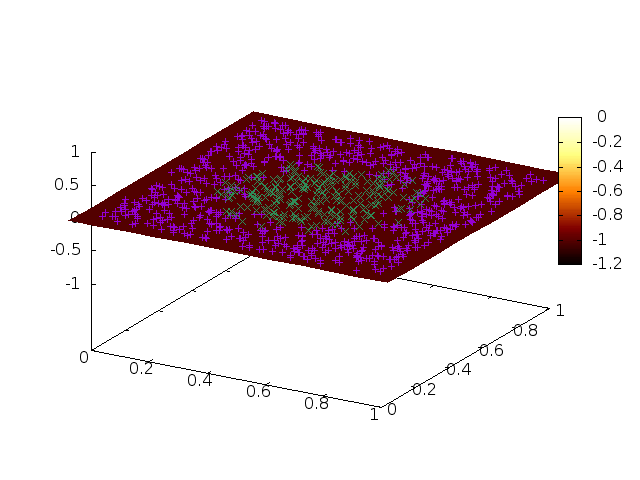

In [672]:
def test_3655e4()
  dataset = circle_dataset()  
  train_data = dataset.clone
  train_data["data"] = dataset["data"][0,900]

  test_data = dataset.clone
  test_data["data"] = dataset["data"][900,100]
  
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: LinearKernel.new
  svm_learner.train train_data  
  plot_decision_boundary dataset["data"], svm_learner
end
test_3655e4()

## Question 2.6 (5 Points)
With the linear Support Vector Machine complete, let's try several values of the $C$ parameter on a sample dataset. Using your ```to_linear_weights``` and ```calculate_margin```, compare the margins on the dataset below.

In [673]:
def test_0026d4()
  dataset = two_gaussians_sep_dataset()  
  learners = [0.001, 0.1, 1, 2, 3, 4, 5].map do |c|
    SupportVectorMachineLearner.new complexity: c, kernel: LinearKernel.new      
  end
  
  stats = learners.map do |learner|
    learner.train dataset  
    model = learner.model
    weights = to_linear_weights model
    margin = calculate_margin dataset, weights
      
    {c: learner.parameters["complexity"], margin: margin, weights: weights}
  end
  
  Daru::DataFrame.new(stats)
end
test_0026d4()

,c,margin,weights
0,0.001,-0.7751791683871789,"{""bias""=>-0.3858764310479164, ""x1""=>0.07054944560700004, ""x2""=>0.055473829790000026}"
1,0.1,-0.14327149208347909,"{""bias""=>-4.161661555793872, ""x1""=>0.5418967094972553, ""x2""=>0.6353688763466115}"
2,1,0.2809754813868902,"{""bias""=>-7.544598345465133, ""x1""=>1.0633739433059786, ""x2""=>1.2870656701510783}"
3,2,0.26147979561749024,"{""bias""=>-8.06565248659338, ""x1""=>1.1222268693164803, ""x2""=>1.3960280383116597}"
4,3,0.27094690657560516,"{""bias""=>-9.70022666152663, ""x1""=>1.3345763000768156, ""x2""=>1.730719950526327}"
5,4,0.36419992512237764,"{""bias""=>-11.926276209820841, ""x1""=>1.6761233756074425, ""x2""=>2.173478319798825}"
6,5,0.36419992512237764,"{""bias""=>-11.926276209820841, ""x1""=>1.6761233756074425, ""x2""=>2.173478319798825}"


## Queston 2.7 (10 Points)

For the dataset in the previous test, the figures below show 3 different margins. Assign the appropriate value of $C\in \left\{0.001,1,4\right\}$ to the figures below.

| (A) | (B) | (C) |
|-----|----|---|
|![A](sep_1.png)|![B](sep_2.png)|![C](sep_3.png)|

If you think that the values of C producing the figures should be ordered as -1, 2, 5, then return the following:

```ruby
def answer_a4bbdd()
  [-1, 2, 5]  
end

```

In [674]:
def answer_a4bbdd()
  [0.001, 4, 1]
end

:answer_a4bbdd

In [675]:
def test_5109bd()
  assert_equal 3, answer_a4bbdd().size
end
test_5109bd()

## Question 3.1 (5 Points)

The simple nonlinear dataset above did not do well at all with the linear kernel. Let's see if we can do better with the Gaussian kernel. Recall the Gaussian Kernel, also known as the RBF kernel, is defined as follows:

# $K_G(x_i, x_j) = e^{-\gamma \left( x_i - x_j \right) ^2}$

Note that in the case of missing features, we should interpret them as having a value of zero.

In [676]:
class GaussianKernel
  def initialize gamma
    @gamma = gamma
  end

  def update_parameter parameter
    parameter.kernel_type = Libsvm::KernelType::RBF
    parameter.gamma = @gamma
  end  
  
  def func x_i, x_j
    
    x_i["features"].each do |key1,array1|
      if !(x_j["features"].key?(key1))
        x_j["features"][key1]=0
      end
    end
    
    x_j["features"].each do |key1,array1|
      if !(x_i["features"].key?(key1))
        x_i["features"][key1]=0
      end
    end
    
    
    sum=0
    x_i["features"].each do |key1,array1|
        sum+=(x_i["features"][key1]-x_j["features"][key1])**2
    end

    return Math.exp(-@gamma*(sum))
  end
end

:func

In [677]:
def test_6e3abc()
  kernel1 = GaussianKernel.new(0.01)
  kernel2 = GaussianKernel.new(0.02)  
  examples =  [
    {"features" => {"a" => 2, "b" => 3}, "label" => 1}, 
    {"features" => {"b" => 7, "c" => 1}, "label" => 7},
    {"features" => {"a" => 2, "b" => 3}, "label" => 2}
  ]
  
  z = {"features" => {"a" => -5, "b" => 2}} 
  
  assert_in_delta 0.60653, kernel1.func(z, examples[0]), 1e-3, "1"
  assert_in_delta 0.36788, kernel2.func(examples[0], z), 1e-3, "2"  
  
  assert_in_delta 0.60049, kernel1.func(z, examples[1]), 1e-3, "3"  
  assert_in_delta 0.36059, kernel2.func(examples[1], z), 1e-3, "4"    
  
  assert_in_delta 0.8105, kernel1.func(examples[0], examples[1]), 1e-3, "5"  
end

test_6e3abc()

## Question 3.2 (5 Points)
Evaluate a trained model with the Gaussian Kernel on the new dataset. Your ```predict``` function should not require any changes to support the new kernel.

We should the the AUC improve considerably on the Circle dataset. Compare the support vectors learned in your test with the original dataset.

![circle_dataset.png](./circle_dataset.png)


In [678]:
def plot_circle_dataset_with_sv(model)
  circle = circle_dataset()["data"]
  x1 = circle.map {|r| r["features"]["x1"]}
  x2 = circle.map {|r| r["features"]["x2"]}
  target = circle.map {|r| "Y = #{r["label"].to_s}"}
  target.size  
  
  s_x1 = model["data"].map {|r| r["features"]["x1"]}
  s_x2 = model["data"].map {|r| r["features"]["x2"]}
  s_target = model["data"].map {|r| "SV Y = #{r["label"]}"}
  df = Daru::DataFrame.new({x1: (s_x1), x2: (s_x2), target: (s_target)})
  df.to_category :target
  df.plot(type: :scatter, x: :x1, y: :x2, categorized: {by: :target, method: :color}) do |plot, diagram|
    plot.xrange [0,1]
    plot.x_label "X1"
    plot.yrange [0,1]  
    plot.y_label "X2"
    plot.legend true
  end.show()
end

:plot_circle_dataset_with_sv

In [680]:
def test_29dfa9()
  dataset = circle_dataset()  
  train_data = dataset.clone
  train_data["data"] = dataset["data"][0,900]

  test_data = dataset.clone
  test_data["data"] = dataset["data"][900,100]
  
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: GaussianKernel.new(2)
  svm_learner.train train_data
  
  gaussian_model = svm_learner.model
  scores = svm_learner.evaluate test_data  
  metric = AUCMetric.new
  fpr, tpr, auc = metric.roc_curve scores
  
  puts "Gaussian model test-set AUC is #{auc}"
  assert_true(auc > 0.9, "AUC > 0.9")
  plot fpr, tpr
end
test_29dfa9()

Gaussian model test-set AUC is 0.9896036387264474


#<Nyaplot::Plot:0x0000000002c46150 @properties={:diagrams=>[#<Nyaplot::Diagram:0x00000000030be520 @properties={:type=>:line, :options=>{:x=>:x, :y=>:y}, :data=>"a9bba115-f622-48e3-a56a-b2458431e622"}, @xrange=[0.0, 0.9876543209876543], @yrange=[0.05263157894736842, 1.0]>], :options=>{:x_label=>"X", :y_label=>"Y", :zoom=>true, :width=>700, :xrange=>[0.0, 0.9876543209876543], :yrange=>[0.05263157894736842, 1.0]}}>

Gaussian model has 250 support vectors


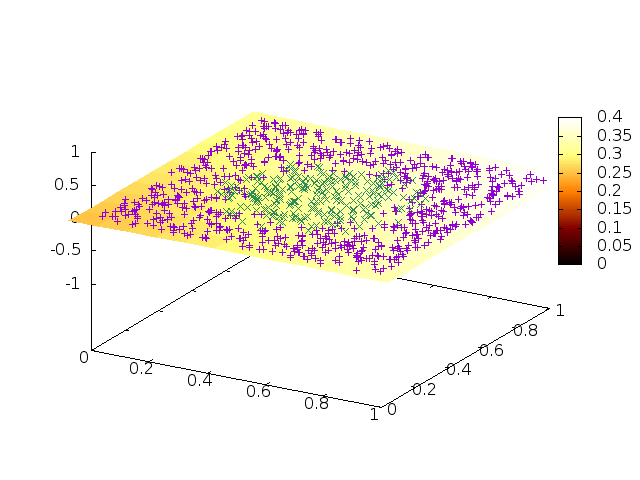

In [654]:
def test_7dfd7c()
  dataset = circle_dataset()  
  train_data = dataset.clone
  train_data["data"] = dataset["data"][0,900]

  test_data = dataset.clone
  test_data["data"] = dataset["data"][900,100]
  
  svm_learner = SupportVectorMachineLearner.new complexity: 1.0, kernel: GaussianKernel.new(2.0)
  svm_learner.train train_data
  
  gaussian_model = svm_learner.model
  puts "Gaussian model has #{gaussian_model["data"].size} support vectors"
  plot_decision_boundary dataset["data"], svm_learner
end
test_7dfd7c()

## Question 3.4 (15 Points)

Compare the un-kernelized version, linear kernel, and Gaussian kernels on this dataset. Provide answers to the following questions as an array below:

1. Which model of the ones we tried had the best performance as measured by AUC for the Circle Dataset
 * (A) Linear Kernel
 * (B) Gaussian Kernel
 * (C) Polynomial Kernel
 * (D) They were the same
1. If there are $N$ examples in the training set, what is the size of the Gram (or kernel) matrix during training?
 * (A) $O(N)$
 * (B) $O(N \log N)$
 * (C) $O(N^2)$
 * (D) $O(1)$
1. For a linear classifier, if there are $N$ examples with $d$ features in the training set, what is the time complexity of calling ```predict``` for one example?
 * (A) $O(Nd)$
 * (B) $O(d)$
 * (C) $O(N^2)$
 * (D) $O(N \log d)$
1. For kernelized classifier, if there are $N$ examples with $d$ features in the training set, what is the time complexity of calling ```predict``` for one example?
 * (A) $O(Nd)$
 * (B) $O(N^2)$
 * (C) $O(N \log d)$
 * (D) $O(d)$
1. Why do you think the Gaussian kernel would have better performance for the Circle dataset?
 * (A) Gaussian kernel did not perform better than anything else.
 * (B) The circle dataset is non-linear and the Gaussian kernel can learn non-linear boundaries.
 * (C) Hinge loss causes the linear kernel to overfit, but the Gaussian kernel is very smooth and therefore less prone to overfitting.
 * (D) The data follows a Gaussian distribution therefore Gaussian kernels should fit the best. 
 
 
If your answers were all A, A, A, A, A, then write the following (case sensitive):

```ruby
def answer_fc3f7a()
  %w(A A A A A A)
end
```

In [615]:
def answer_fc3f7a()
  ["B", "C", "B", "A", "B"]
end

:answer_fc3f7a

In [616]:
def test_06cf43()
  t51_answers = answer_fc3f7a()

  assert_not_nil t51_answers, "1"
  assert_true(t51_answers.is_a?(Array))
  assert_equal(5, t51_answers.size)
  assert_true(t51_answers.any? {|a| a.size == 1 and a =~ /[A-Z]/})

end
test_06cf43()